In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ---------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"car_data.csv")
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


# Data Quality Check

In [4]:
df.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [5]:
df.duplicated().sum()

94

In [6]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

- Year has Non-year values too
- Convert it from Object to Int

In [7]:
df['Price'].unique()

array(['80,000', '4,25,000', 'Ask For Price', '3,25,000', '5,75,000',
       '1,75,000', '1,90,000', '8,30,000', '2,50,000', '1,82,000',
       '3,15,000', '4,15,000', '3,20,000', '10,00,000', '5,00,000',
       '3,50,000', '1,60,000', '3,10,000', '75,000', '1,00,000',
       '2,90,000', '95,000', '1,80,000', '3,85,000', '1,05,000',
       '6,50,000', '6,89,999', '4,48,000', '5,49,000', '5,01,000',
       '4,89,999', '2,80,000', '3,49,999', '2,84,999', '3,45,000',
       '4,99,999', '2,35,000', '2,49,999', '14,75,000', '3,95,000',
       '2,20,000', '1,70,000', '85,000', '2,00,000', '5,70,000',
       '1,10,000', '4,48,999', '18,91,111', '1,59,500', '3,44,999',
       '4,49,999', '8,65,000', '6,99,000', '3,75,000', '2,24,999',
       '12,00,000', '1,95,000', '3,51,000', '2,40,000', '90,000',
       '1,55,000', '6,00,000', '1,89,500', '2,10,000', '3,90,000',
       '1,35,000', '16,00,000', '7,01,000', '2,65,000', '5,25,000',
       '3,72,000', '6,35,000', '5,50,000', '4,85,000', '3,29,5

- Remove that string
- Convert all string to int

In [8]:
df['kms_driven'].unique()

array(['45,000 kms', '40 kms', '22,000 kms', '28,000 kms', '36,000 kms',
       '59,000 kms', '41,000 kms', '25,000 kms', '24,530 kms',
       '60,000 kms', '30,000 kms', '32,000 kms', '48,660 kms',
       '4,000 kms', '16,934 kms', '43,000 kms', '35,550 kms',
       '39,522 kms', '39,000 kms', '55,000 kms', '72,000 kms',
       '15,975 kms', '70,000 kms', '23,452 kms', '35,522 kms',
       '48,508 kms', '15,487 kms', '82,000 kms', '20,000 kms',
       '68,000 kms', '38,000 kms', '27,000 kms', '33,000 kms',
       '46,000 kms', '16,000 kms', '47,000 kms', '35,000 kms',
       '30,874 kms', '15,000 kms', '29,685 kms', '1,30,000 kms',
       '19,000 kms', nan, '54,000 kms', '13,000 kms', '38,200 kms',
       '50,000 kms', '13,500 kms', '3,600 kms', '45,863 kms',
       '60,500 kms', '12,500 kms', '18,000 kms', '13,349 kms',
       '29,000 kms', '44,000 kms', '42,000 kms', '14,000 kms',
       '49,000 kms', '36,200 kms', '51,000 kms', '1,04,000 kms',
       '33,333 kms', '33,600 kms', '5,

- Remove kms from suffix
- Convert Object to Int
- Remove Commas

In [9]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

- Deal with Nan values

In [10]:
df['name'].unique()

array(['Hyundai Santro Xing XO eRLX Euro III', 'Mahindra Jeep CL550 MDI',
       'Maruti Suzuki Alto 800 Vxi',
       'Hyundai Grand i10 Magna 1.2 Kappa VTVT',
       'Ford EcoSport Titanium 1.5L TDCi', 'Ford Figo', 'Hyundai Eon',
       'Ford EcoSport Ambiente 1.5L TDCi',
       'Maruti Suzuki Alto K10 VXi AMT', 'Skoda Fabia Classic 1.2 MPI',
       'Maruti Suzuki Stingray VXi', 'Hyundai Elite i20 Magna 1.2',
       'Mahindra Scorpio SLE BS IV', 'Audi A8', 'Audi Q7',
       'Mahindra Scorpio S10', 'Maruti Suzuki Alto 800',
       'Hyundai i20 Sportz 1.2', 'Maruti Suzuki Alto 800 Lx',
       'Maruti Suzuki Vitara Brezza ZDi', 'Maruti Suzuki Alto LX',
       'Mahindra Bolero DI', 'Maruti Suzuki Swift Dzire ZDi',
       'Mahindra Scorpio S10 4WD', 'Maruti Suzuki Swift Vdi BSIII',
       'Maruti Suzuki Wagon R VXi BS III',
       'Maruti Suzuki Wagon R VXi Minor',
       'Toyota Innova 2.0 G 8 STR BS IV', 'Renault Lodgy 85 PS RXL',
       'Skoda Yeti Ambition 2.0 TDI CR 4x2',
       'Maru

- keeep first 3 word of name

# Cleaning Data

In [11]:
car = df.copy()

In [12]:
# if string is numeric keep else drop
car = car[car['year'].str.isnumeric()]
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [13]:
car['year'] = car['year'].astype(int)

In [14]:
# Dealing with ask for price

car = car[car['Price']!="Ask For Price"]
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
6,Ford Figo,Ford,2012,"1,75,000","41,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [15]:
# Replacing , with ""

car['Price'] = car['Price'].str.replace(',','')
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,"45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40 kms,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,"28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,"36,000 kms",Diesel
6,Ford Figo,Ford,2012,175000,"41,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,300000,"1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,"27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000,"40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,Petrol,NaN


In [16]:
car['Price'] = car['Price'].astype(int)

In [17]:
# Replacing , with ""

lst = [',','kms', ' ']
for i in lst:
    car['kms_driven'] = car['kms_driven'].str.replace(i,'')
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000,40000,Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,Petrol,NaN


In [18]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000,40000,Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,Petrol,NaN


In [19]:
# # if string is numeric keep else drop
car = car[car['kms_driven'].str.isnumeric()]
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [20]:
car['kms_driven'] = car['kms_driven'].astype(int)

In [21]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int32 
 3   Price       817 non-null    int32 
 4   kms_driven  817 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [22]:
# Want all the rows where NaN is not present

car = car[~car['fuel_type'].isna()]
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [23]:
# Keep First 3 Characters in the name

car['name'] = car['name'].str.split(' ').str.slice(0,3).str.join(' ')
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [24]:
car.reset_index(drop=True, inplace=True)

In [25]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [26]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [27]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [28]:
# Treating Outliers } min: 30k, 25%: 175k, 50%: 300k, 75%: 500k, max: 850k 

car = car[car['Price']<6e6].reset_index(drop=True)

In [29]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


<AxesSubplot:>

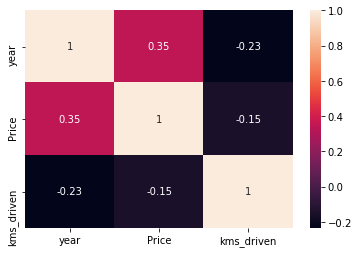

In [30]:
sns.heatmap(car.corr(),annot=True)

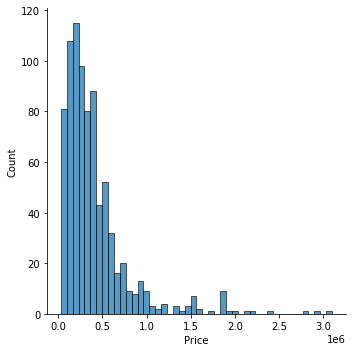

In [31]:
sns.displot(car['Price'])

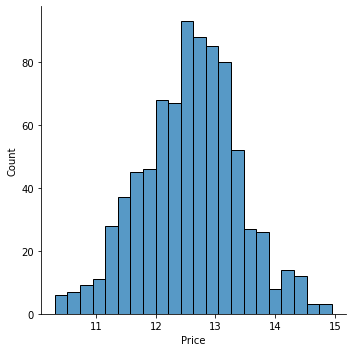

In [32]:
sns.displot(np.log(car['Price']))

## Splitting Data

In [33]:
X = car.drop(columns='Price')
y = car['Price']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.svm import SVR

In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

ohe = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])

OneHotEncoder()

In [37]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

col_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                     ['name', 'company', 'fuel_type']), remainder='passthrough')

lr = LinearRegression()
pipe = make_pipeline(col_trans, lr)

In [38]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Pe

In [39]:
y_pred = pipe.predict(X_test)
y_pred

array([ 307875.17891811,  301466.30855268,  459137.75302434,
       1431804.90984785,  291865.08664093,  136478.68652149,
        200280.71311188,  689572.60772571,  323605.79107014,
        767201.33322232,   94074.18510992,  203806.46422583,
        172460.93894769,  277762.33908416,  224076.37604188,
        262468.52232751,  272950.64799216,  188439.34235313,
        560771.23774657,  504687.93676922,  429098.11532449,
        101532.4188574 ,  683150.36054748,  235217.00125141,
        624683.33259995,  311481.26506402,  239941.08325033,
        105057.14011449,  429665.4044836 ,  485472.97474949,
       1594131.24556157,  692349.03635705,  274945.51445795,
        768856.74110904,  351534.74016447,  518431.37089414,
         24116.28352806,  267268.13897893,  457070.77308963,
        400119.54102965,  130230.3394916 ,  374299.75902244,
        410173.48311723,  222760.33714301,  692349.03635705,
        342756.49229817, 1893562.58545338,  506695.83124211,
        297244.34751664,

In [40]:
r2_score(y_test,y_pred)

0.6621544305463363

In [41]:
mean_squared_error(y_test,y_pred)

68828911838.99606

In [42]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [43]:
def applyAlgo(algo):
    col_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                         ['name', 'company', 'fuel_type']), remainder='passthrough')

    algo = algo()
    pipe = make_pipeline(col_trans, algo)

    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)
    
    print(f"R2-Score Of {algo}: {r2_score(y_test,y_pred)}")
    print(f"MSE Of {algo}: {mean_squared_error(y_test,y_pred)}")
    print(f"MAE Of {algo}: {mean_absolute_error(y_test,y_pred)}")
    print('-'*50)

algorithms = [RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, LinearRegression, Lasso, Ridge, 
                DecisionTreeRegressor, KNeighborsRegressor, ExtraTreesRegressor, xgb.XGBRegressor]

for i in algorithms:
    applyAlgo(i)

R2-Score Of RandomForestRegressor(): 0.6216473832540731
MSE Of RandomForestRegressor(): 77081368698.04514
MAE Of RandomForestRegressor(): 122973.59488436067
--------------------------------------------------
R2-Score Of GradientBoostingRegressor(): 0.6315801122830798
MSE Of GradientBoostingRegressor(): 75057784574.19916
MAE Of GradientBoostingRegressor(): 143333.91973883408
--------------------------------------------------
R2-Score Of AdaBoostRegressor(): 0.2331872007528436
MSE Of AdaBoostRegressor(): 156221940816.76437
MAE Of AdaBoostRegressor(): 290937.09340302675
--------------------------------------------------
R2-Score Of LinearRegression(): 0.6621544305463363
MSE Of LinearRegression(): 68828911838.99606
MAE Of LinearRegression(): 117363.36195087821
--------------------------------------------------
R2-Score Of Lasso(): 0.5081717220953772
MSE Of Lasso(): 100199642205.06203
MAE Of Lasso(): 130692.64075318933
--------------------------------------------------
R2-Score Of Ridge(): 

In [44]:
def applyAlgo(algo):
    col_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),
                                         ['name', 'company', 'fuel_type']), remainder='passthrough')

    algo = algo()
    pipe = make_pipeline(col_trans, algo)

    pipe.fit(X_train,y_train)

    y_pred = pipe.predict(X_test)
    
    print(f"R2-Score Of {algo}: {r2_score(y_test,y_pred)}")
    print(f"MSE Of {algo}: {mean_squared_error(y_test,y_pred)}")
    print(f"MAE Of {algo}: {mean_absolute_error(y_test,y_pred)}")
    print('-'*50)

algorithms = [RandomForestRegressor, LinearRegression, ExtraTreesRegressor]

for i in algorithms:
    applyAlgo(i)

R2-Score Of RandomForestRegressor(): 0.6366472669984706
MSE Of RandomForestRegressor(): 74025458633.84662
MAE Of RandomForestRegressor(): 119043.1218733567
--------------------------------------------------
R2-Score Of LinearRegression(): 0.6621544305463363
MSE Of LinearRegression(): 68828911838.99606
MAE Of LinearRegression(): 117363.36195087821
--------------------------------------------------
R2-Score Of ExtraTreesRegressor(): 0.7237875201420014
MSE Of ExtraTreesRegressor(): 56272469269.67356
MAE Of ExtraTreesRegressor(): 108776.45242331289
--------------------------------------------------


In [46]:
# Selecting Extra Tree Regressor

scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)
    ex = ExtraTreesRegressor()
    pipe=make_pipeline(col_trans,ex)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [50]:
pd.DataFrame(scores).max()

0    0.930377
dtype: float64

In [51]:
np.argmax(scores)

712

In [52]:
scores[np.argmax(scores)]

0.9303769827945784

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=712)
ex = ExtraTreesRegressor()
pipe=make_pipeline(col_trans,ex)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9264860016365697

In [57]:
import pickle
pickle.dump(pipe,open('ExtraTreesRegressorModel.pkl','wb'))

In [61]:
X_test

,name,company,year,kms_driven,fuel_type
582,Maruti Suzuki Swift,Maruti,2014,44000,Petrol
709,Maruti Suzuki Omni,Maruti,2013,25000,Petrol
319,Volkswagen Polo,Volkswagen,2010,60000,Diesel
398,Hyundai Creta 1.6,Hyundai,2016,25000,Petrol
729,Hyundai Santro Xing,Hyundai,2007,65000,Petrol
...,...,...,...,...,...
131,Maruti Suzuki Swift,Maruti,2013,41000,Petrol
577,Mahindra Xylo E8,Mahindra,2009,64000,Diesel
287,Tata Indica V2,Tata,2008,11000,Petrol
518,Maruti Suzuki Swift,Maruti,2009,45000,Petrol


In [78]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],
                          data=np.array(['Maruti Suzuki Swift','Maruti',2009,45000,'Petrol']).reshape(1,5)))

array([206150.])

In [79]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [89]:
import pickle

pickle.dump(X,open('cardata.pkl','wb'))

In [83]:
len(sorted(car['kms_driven'].unique()))

246

In [84]:
df['fuel_type'].value_counts()

Petrol    440
Diesel    395
LPG         2
Name: fuel_type, dtype: int64

In [85]:
df['fuel_type'].uniqueue()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [86]:
X.columns

Index(['name', 'company', 'year', 'kms_driven', 'fuel_type'], dtype='object')

In [87]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
811,Tata Indica V2,Tata,2009,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,132000,Petrol
813,Tata Zest XM,Tata,2018,27000,Diesel


In [88]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [93]:
model = pickle.load(open("ExtraTreesRegressorModel.pkl","rb"))

model.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],
                           data=np.array(['Maruti Suzuki Swift','Maruti',2009,45000,'Petrol']).reshape(1,5)))

array([206150.])